# Solution: Pandas and Seaborn
## Data Science with Python
## Yoav Ram

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
import numpy as np
import urllib.request
import zipfile
import os.path
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "simple_white"

# Exercise 1

In this question we will look for a relation between litter or clutch size (number of offspring per birth) and the birth weight (the weight of the offpring) in the animal kingdom.

For this analysis we will load the [AnAge](http://genomics.senescence.info/download.html#anage) dataset that we used in the [Pandas and Seaborn](../sessions/pandas-seaborn.ipynb) session.

Open the data file and read the data to a `DataFrame`. We are interested in the `Litter/Clutch size` and `Birth weight (g)` columns.

In [3]:
data = pd.read_csv('../data/anage_data.txt', sep='\t')

If you examined the data you might have noticed that some rows have a `NaN` value in our columns of interest. 
We need to remove these rows from the data.
You can use `np.isnan`, `np.isfinite` or any other method you'd like.

In [4]:
data = data[np.isfinite(data['Litter/Clutch size'])]
data = data[np.isfinite(data['Birth weight (g)'])]

assert not np.isnan(data['Litter/Clutch size']).any() ###
assert not np.isnan(data['Birth weight (g)']).any() ###

We are looking for a possible linear relationship between the variables.

Plot a scatter plot of the data, and consider if you should transform the data using a transformation such as log, square-root, reciprocal ($1/x$) or some other transformation that makes sense to you. 
Both columns might require transformations.

Plot a new scatter plot of the transformed data.

Don't forget the axes labels should change to reflect the transformation! 
But in the plot I left below I didn't put the name of the transformation I chose so that it is a _secret_...

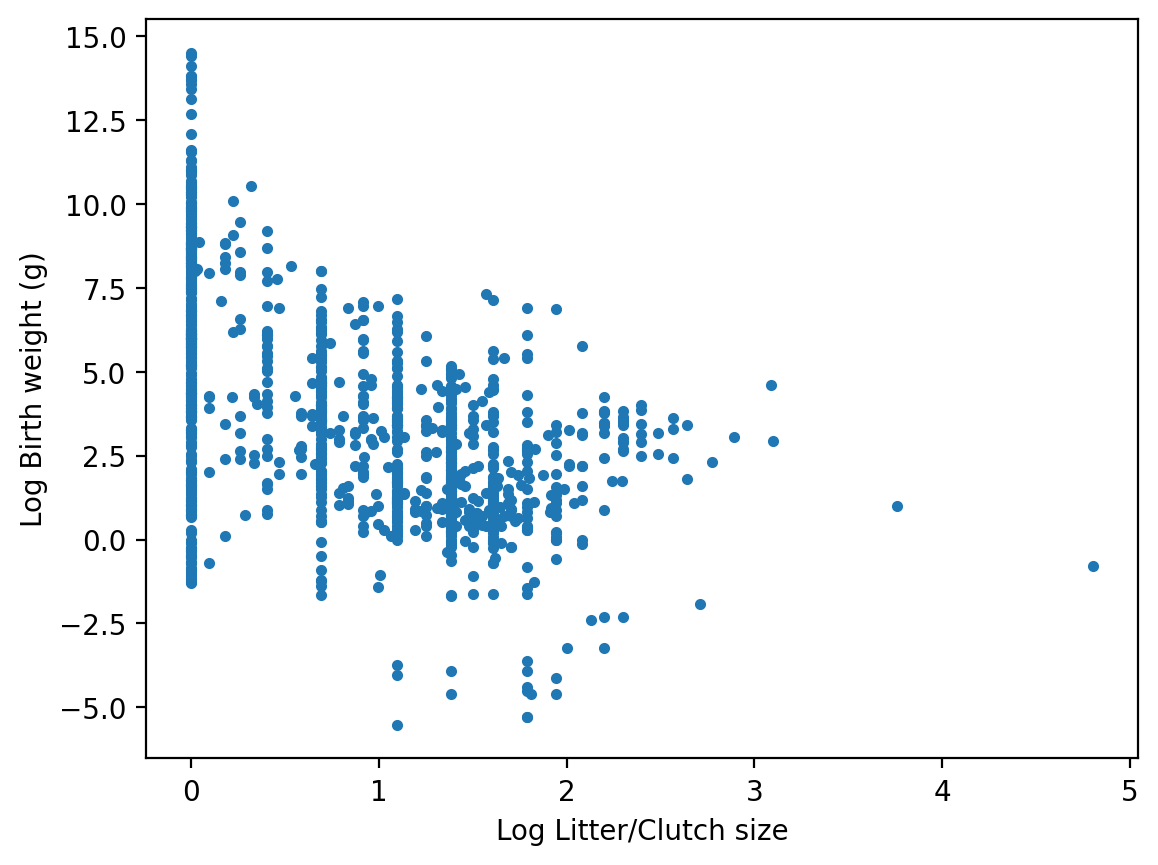

In [5]:
data['Log Litter/Clutch size'] = np.log(data['Litter/Clutch size'])
data['Log Birth weight (g)'] = np.log(data['Birth weight (g)'])

data.plot(x='Log Litter/Clutch size', y='Log Birth weight (g)', marker='.', ls='')
plt.xlabel('Log Litter/Clutch size')
plt.ylabel('Log Birth weight (g)')
plt.legend().set_visible(False)

After applying a transformation for which there is a good correlation between the litter size and the birth weight, create a linear model plot using Seaborn.

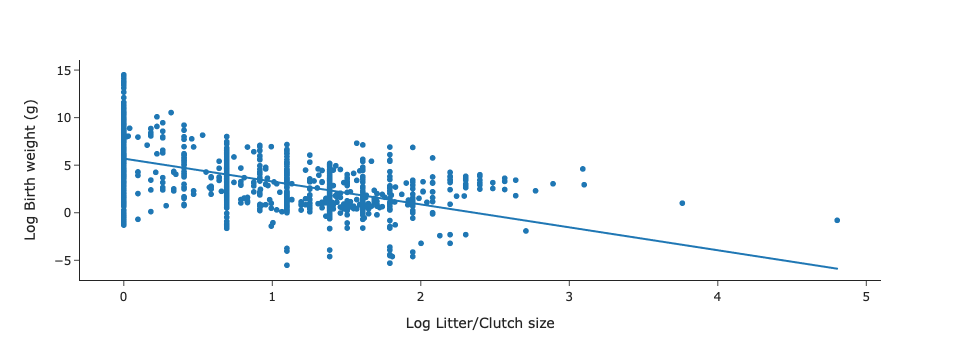

In [7]:
fig = px.scatter(
    data,
    x='Log Litter/Clutch size', 
    y='Log Birth weight (g)', 
    trendline='ols',
    width=400
)
fig.show()

### Bonus questions

Now we should be satisfied that there is a linear relationship between the variables.

Please perform linear regression on the transformed data using `scipy.stats.linregress`.
Print the intercept and slope of the regression.

Note that if you used a different transformation you might get different values; that's OK as long as your results make sense.

In [8]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    x=data['Log Litter/Clutch size'], y=data['Log Birth weight (g)'])
print("intercept: {:.3f}, slope: {:.3f}".format(intercept, slope)) ###

intercept: 5.693, slope: -2.410


Note that `linregress` provides a p-value for the null hypothesis that the slope is 0.

Think: What does it mean if the null hypothesis is rejected? 

Decide if the null hypothesis can be rejected and print a statement that summarizes the result regarding litter size and birth weight.

Don't forget to print the p-value to support your claim.

In [9]:
print("p-value={:.2g}".format(p_value))
if p_value < 0.05:
    if slope > 0:
        print("Litter size has significant and positive effect on birth weight")
    else:
        print("Litter size has significant and negative effect on birth weight")
else:
    print("Litter size does not have a significant effect on birth weight")

p-value=9e-97
Litter size has significant and negative effect on birth weight


Finally, use the slope and intercept to predict the birth weight of offspring in a litter with 10 offspring (don't forget the transformation!).

In [10]:
print("In a litter with 10 offspring, the birth weight will be", 
      np.exp(intercept + slope * np.log(10.)), "grams")

In a litter with 10 offspring, the birth weight will be 1.1552525754218677 grams


# Exercise 2

In this analysis we will compare the body temperature of animals to check if indeed there is such a thing as [warm-blooded](http://en.wikipedia.org/wiki/Warm-blooded) and cold-blooded animals.

You'll need to reload the data since in the previous exercise you removed some of the rows.

In [11]:
data = pd.read_csv('../data/anage_data.txt', sep='\t')

The temperatures are in Kelvin degrees in the `Temperature (K)` column, and we like Celsius degrees, so use transform the temperature to Celsius and save the result in a new column.

Note: SciPy has a special function for Kelvin to Celsius conversion: `scipy.constants.convert_temperature`.

In [12]:
from scipy.constants import convert_temperature
data['Temperature (C)'] = convert_temperature(data['Temperature (K)'], 'K', 'C')

Plot a histogram of the temperatures (in Celsius). Don't forget to use meaningful `bins`.

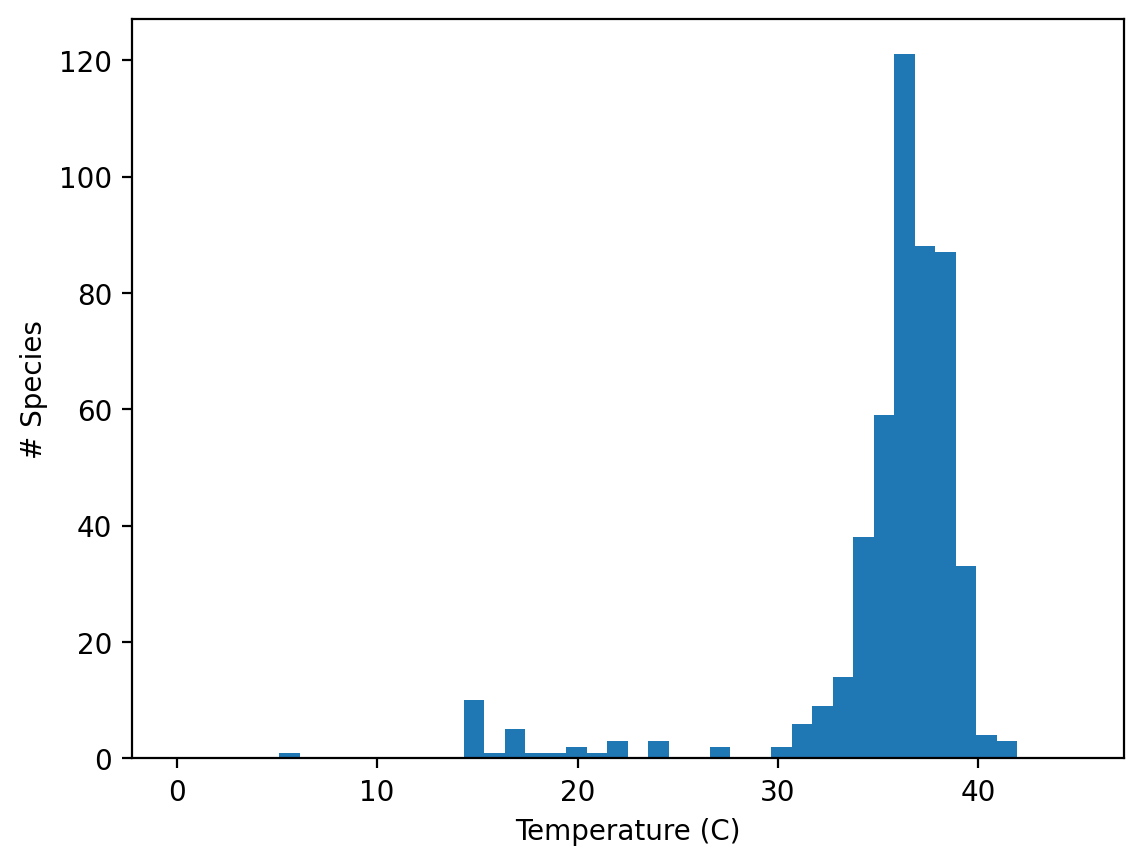

In [13]:
bins = np.linspace(0, 45, 45)
plt.hist(data['Temperature (C)'], bins=bins, lw=0)
plt.xlabel("Temperature (C)")
plt.ylabel("# Species");

Count how many species we have in the data frame in each `Class`.
Remove from the data classes with fewer than 10 species (you can do this manually by specifiyng the class names or automatically using the count you calculated).

Don't forget to clean the data frame from rows with missing data in the temperature column.

In [14]:
data = data[np.isfinite(data['Temperature (C)'])]
data['Class'].value_counts()

Class
Mammalia    457
Amphibia     18
Reptilia     16
Aves          3
Name: count, dtype: int64

In [15]:
data = data[data["Class"] != 'Aves']

Plot a separate histogram of the temperature for each animal Class.

Class
Amphibia    Axes(0.125,0.11;0.775x0.77)
Mammalia    Axes(0.125,0.11;0.775x0.77)
Reptilia    Axes(0.125,0.11;0.775x0.77)
Name: Temperature (C), dtype: object

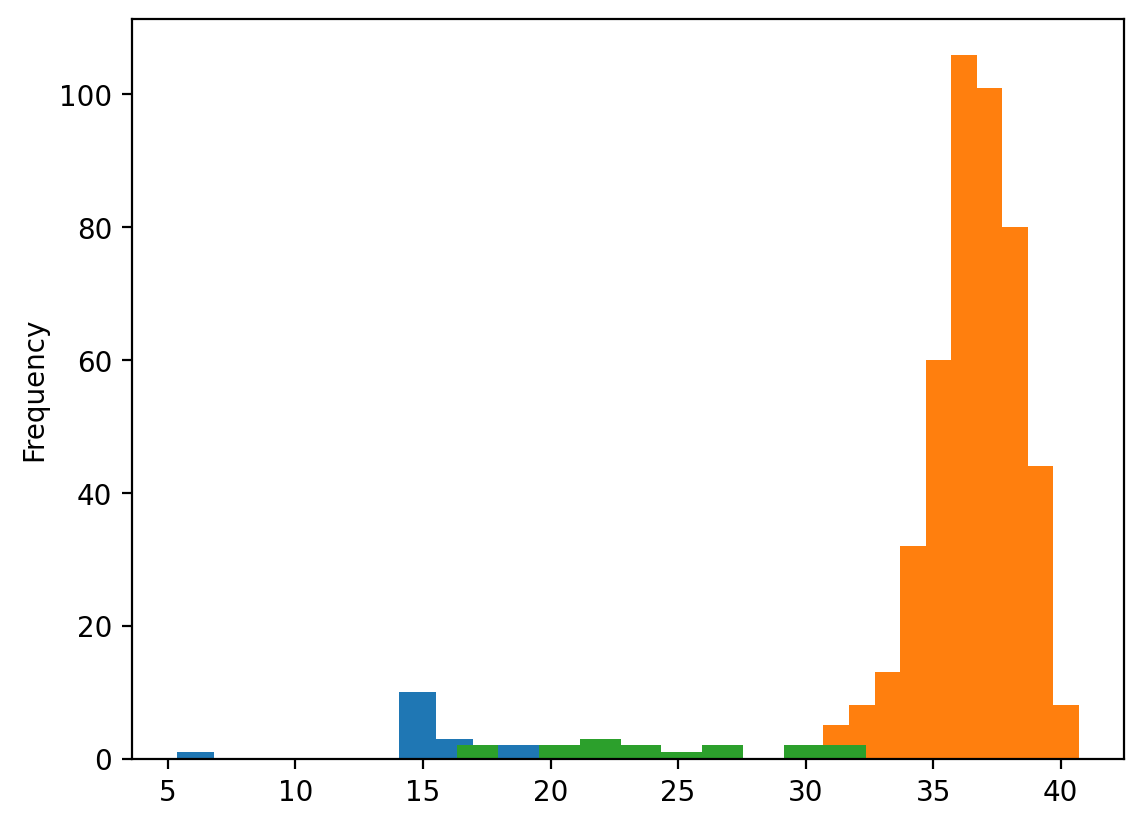

In [24]:
grps = data.groupby('Class')
grps['Temperature (C)'].plot.hist(grid=False)

### Bonus questions

Perform a [t-test](http://iaingallagher.tumblr.com/post/50980987285/t-tests-in-python) to verify that the temperature of mammals is, on average, larger then the temperature of amphibians.
Print the result of the t-test.

The t-test is available in `scipy.stats.ttest_ind`.

In [25]:
mammalia = data.loc[data.Class=='Mammalia', 'Temperature (C)']
amphibia = data.loc[data.Class=='Amphibia', 'Temperature (C)']
t, p_value = scipy.stats.ttest_ind(mammalia, amphibia, equal_var=False)
H0_rejected = p_value < 0.05
print("The temperatures of mammals and amphibians are different? {}".format(H0_rejected)) ###
print("P-value: {:.2g}".format(p_value)) ###

The temperatures of mammals and amphibians are different? True
P-value: 1.9e-16


**End**